# SOLUTION TO THE PROJECT TRAFFIC SIGN CLASSIFIER.


### Questions to be answered in this project following the rubric.
- 1)  Summary of the given dataset.
- 2)  Vizualization of the given dataset.
- 3)  What are the pre-porcessing techniques used and why?
- 4)  Summarize the train and test data setup, data augmentation methods.
- 5)  How does the final architecture of the setup look like, and why?. Give a visual feed.
- 6)  HOW WAS THE MODEL TRAINED, which optimizer is used and why, what is the batch size, number of epochs, and hyperparameters.
- 7)  What are the approaches followed towards a solution to the stated problem. How good is the final approach (based on the         percentage of accuracy).
- 8)  Test the model on five new German trafffic sign images from web.
- 9)  Is the model able to perform equally well on captured pictures or a live camera stream when compared to testing on the           dataset.
- 10) Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here.       Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the             correct prediction appear in the top k? (k should be 5 at most)
- 11) If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired           images.
- 12) Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for           interesting characteristics in traffic sign images 

### Steps followed sequentially during the exection of the classifier system:
#### Step 1: Data Exploration.
#### Step 2: Visualize the Data and Summarize the data.
#### Step 3: Design and Test a model Architecture.
#### Step 4: Test the model on new Images.
#### Step 5: Store the Model for future use.
#### Step 6: Summarize the entire solution.
#### Step 7: Acknowledgements and sources.

## Step 1 : Data Exploration:
First we need to familiarize ourselves with the dataset. This problem deals with the dataset of German Traffic Signs. During data exploration we need to see if the datasets are well balenced, because if they are no so, the model can get biased towards a class with higher number of images, which is to be avoided.

In [2]:
# import the required libraries and packages
import numpy as np
import tensorflow as tf
import cv2
import csv
import pickle
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec #check step:7 #http://matplotlib.org/users/gridspec.html
import os
import sys
#import time as time
from timeit import default_timer as timer # check step:7 #https://docs.python.org/2/library/timeit.html
import random
from sklearn.preprocessing import OneHotEncoder # check step:7 #http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
#from sklearn.cross_validation import train_test_split, this is depricated in tensorflow 1.0 and used as .model_selection method.
from sklearn.model_selection import train_test_split
from PIL import Image as pimag
from IPython.display import Image as ipimag
from IPython.display import display as ipdis
import pandas as pd
import prettytensor as pt # checkstep:7 # https://github.com/google/prettytensor
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix # check step:7 #http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# var init
indir = 'traffic_sign_data'
outdir = 'modelsol'
sess = tf.InteractiveSession() # check step:7 #https://www.tensorflow.org/versions/r0.11/api_docs/python/client/session_management#InteractiveSession
SEED = 200
random.seed(SEED) # http://stackoverflow.com/questions/22639587/random-seed-what-does-it-do
np.random.seed(SEED)
tf.set_random_seed(SEED) # https://www.tensorflow.org/api_docs/python/tf/set_random_seed
%matplotlib inline

In [3]:
#  LOAD THE DATA
def load_data(trainf,testf,signf): 
    training_file  = indir +'/'+trainf
    testing_file   = indir +'/'+testf
    classnames_file = indir +'/'+signf

    classnames = []
    with open(classnames_file) as _f:
        rows = csv.reader(_f, delimiter=',')
        next(rows, None)  # skip the headers
        for i, row in enumerate(rows):
            assert(i==int(row[0]))
            classnames.append(row[1])
 
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test   = test['features'], test['labels']
    
    
    X_train  = X_train.astype(np.float32)
    y_train  = y_train.astype(np.int32)
    X_test   = X_test.astype(np.float32)
    y_test   = y_test.astype(np.int32)
    
    return  classnames, X_train, y_train, X_test, y_test

Given: The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [4]:
# Getting dataset parameters.
classnames, X_train, y_train, X_test, y_test = load_data(trainf='train.p',testf='test.p',signf='signnames.csv') 
 
# TODO: Number of training examples 
num_train = len(X_train)

# TODO: Number of testing examples.
num_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
_, height, width, channel = X_train.shape
image_shape = (height, width, channel)

# TODO: How many unique classes/labels there are in the dataset.
num_class = len(np.unique(y_train))


print("Number of training examples =", num_train )
print("Number of testing examples =", num_test )
print("Image data shape =", image_shape)
print("Number of classes =", num_class)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Now we know that our dataset has 43 classes and train/test is approximately = 3, the image shape is 32x32x3.

## Step 2: Visualize and summarize the data


The above data summary shows that classes are not equally distributed and require data augmentation for training the network.


In [7]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_sorted = sorted(data_i, key=lambda x: x[1])
sorted_data = [data_sorted[i][0] for i in range(len(data_sorted))]
print(sorted_data)

[0, 19, 37, 27, 32, 41, 42, 24, 29, 21, 39, 20, 40, 22, 36, 6, 16, 34, 30, 23, 28, 15, 26, 33, 14, 31, 17, 18, 35, 11, 3, 8, 7, 9, 25, 5, 4, 10, 38, 12, 13, 1, 2]


In [8]:
def insert_subimage(image, sub_image, y, x): 
    h, w, c = sub_image.shape
    image[y:y+h, x:x+w, :]=sub_image 
    return image

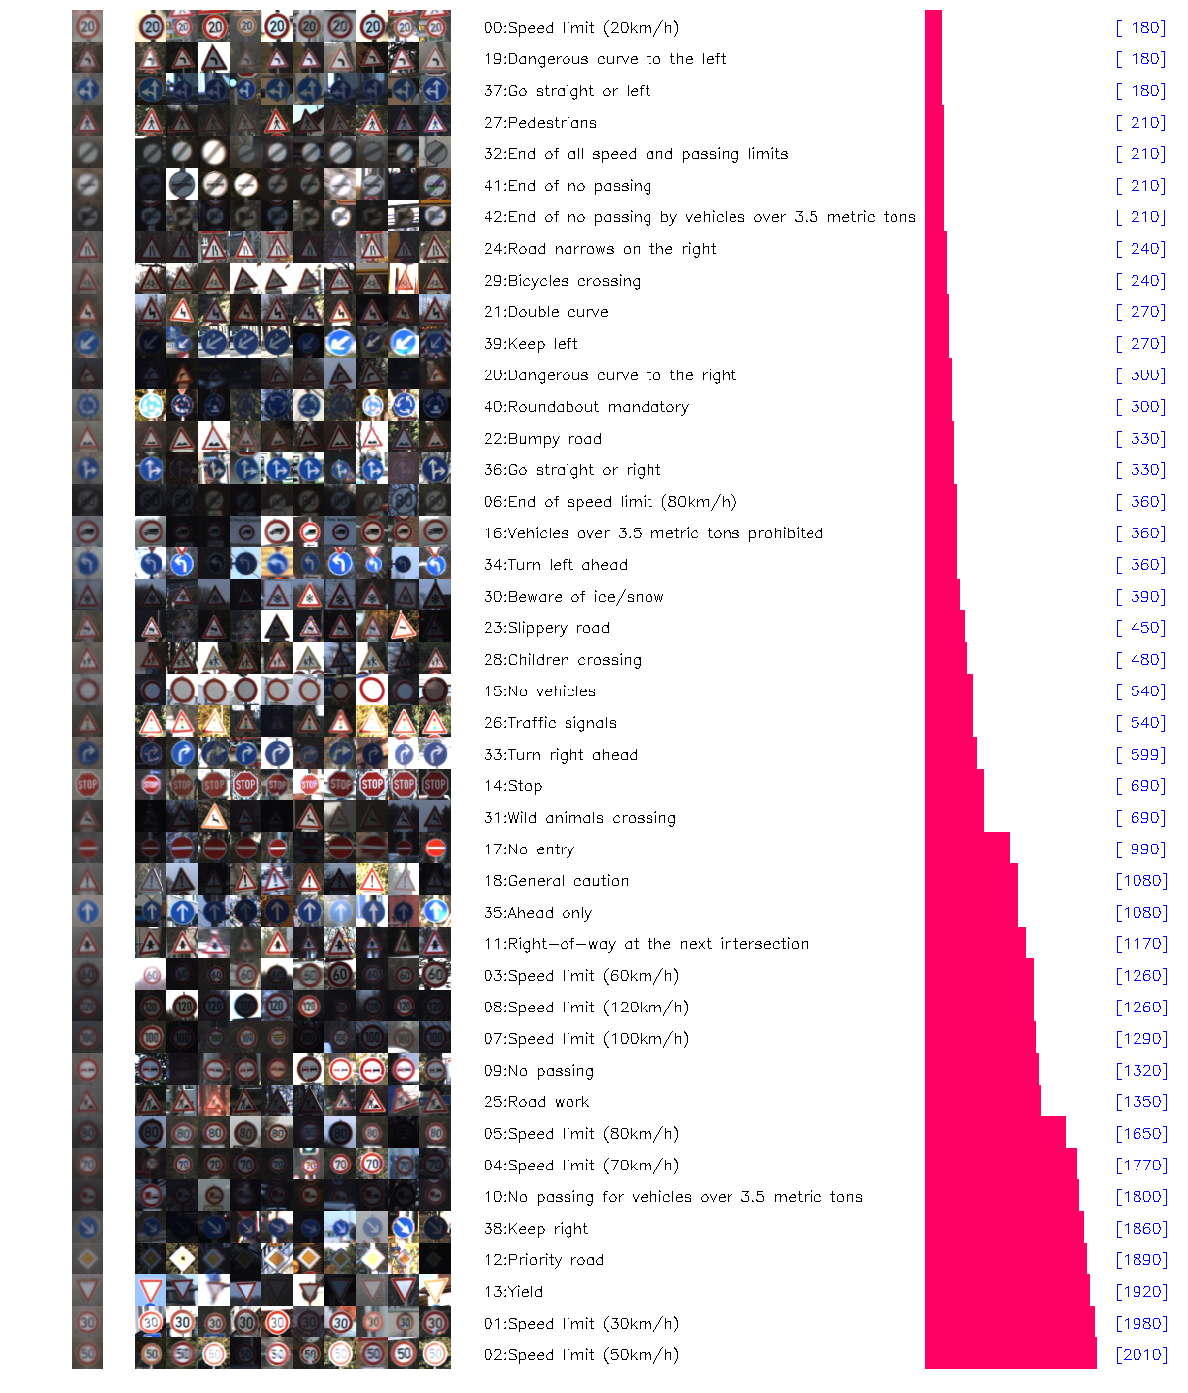

In [25]:
images, labels = X_train, y_train
#images, labels = X_test, y_test
    
#count
#h = np.histogram(train_labels, bins=np.arange(num_class))

#results image
num_sample=10
results_image = 255.*np.ones(shape=(num_class*height,(num_sample+4+22)*width, channel),dtype=np.float32)
z=0
for c in sorted_data:
    #make mean
    idx = list(np.where(labels== c)[0])
    mean_image = np.average(images[idx], axis=0)
    insert_subimage(results_image, mean_image, z*height, width)

    # imshow('mean_image',mean_image)
    # imshow('label_image',label_image)
    # cv2.waitKey(0)

    #make random sample
    for n in range(num_sample):
        sample_image = images[np.random.choice(idx)]
        insert_subimage(results_image, sample_image, z*height, (3+n)*width)

    #print summary
    count=len(idx)
    percentage = float(count)/float(len(images))
    cv2.putText(results_image, '%02d:%-6s'%(c, classnames[c]), ((4+num_sample)*width, int((z+.7)*height)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
    cv2.putText(results_image, '[%4d]'%(count), ((2+num_sample+22)*width, int((z+0.7)*height)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1)
    cv2.rectangle(results_image,((2+num_sample+16)*width, z*height),((2+num_sample+16)*width + round(percentage*3000), (z+1)*height),(255,0,100),-1)
    z+=1

 
cv2.imwrite(outdir+'/train_data_summary.jpg',cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))



plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(results_image.astype(np.uint8))
plt.axis('off') 
plt.show()

## Step 3 : Design and Test a model architecture